# Coin Charting

In [6]:
import matplotlib.pyplot as plt
import math
import random
import statistics as st
import numpy as np
import seaborn as sns
%matplotlib inline

In [4]:
def coin_flip():
    return random.randint(1, 2) == True

In [10]:
def simulate_flips(flips=2**16):
    totals = {'heads': 0, 'tails': 0}
    hcount = []
    tcount = []
    diffs = []
    rats = []
    means = []
    stds = []
    counter = 1
    x = 0
    while counter <= flips:
        increment = 2**x
        if coin_flip():
            totals['heads'] += 1
        else:
            totals['tails'] += 1
        heads = totals['heads']
        tails = totals['tails']
        if counter == increment:
            if totals['tails'] != 0:
                hcount.append(heads)
                tcount.append(tails)
                diffs.append(heads - tails)
                rats.append(heads/tails)
                means.append(st.mean(rats))
                if len(rats) > 1:
                    stds.append(st.stdev(rats))
            x += 1
        counter += 1
    hcount.append(totals['heads'])
    tcount.append(totals['tails'])
    diffs.append(heads - tails)
    rats.append(heads/tails)
    means.append(st.mean(rats))
    stds.append(st.stdev(rats))
    return totals, hcount, tcount, diffs, rats, means, stds

In [11]:
totals, hcount, tcount, diffs, rats, means, stds = simulate_flips()

In [19]:
print(totals)

{'heads': 32888, 'tails': 32648}


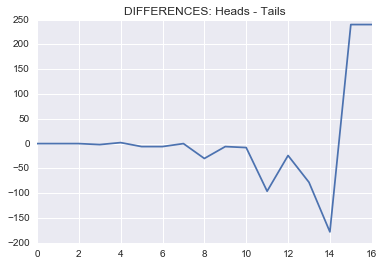

In [26]:
plt.plot(diffs)
plt.title('DIFFERENCES: Heads - Tails')
plt.show()

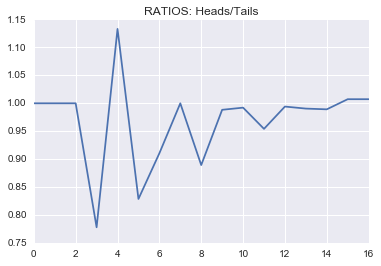

In [27]:
plt.plot(rats)
plt.title('RATIOS: Heads/Tails')
plt.show()

## Thoughts

As the number of flips increases, the difference between heads and tails becomes greater... but not the ratio of heads to tails.  The ratio approaches zero as flips increase.

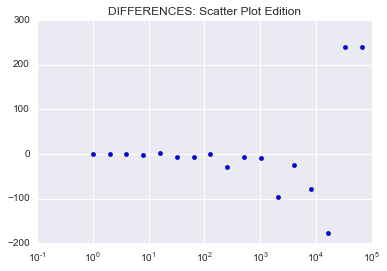

In [32]:
plt.scatter([2**n for n in range(len(diffs))], diffs)
plt.title('DIFFERENCES: Scatter Plot Edition')
plt.xscale('log')
plt.show()

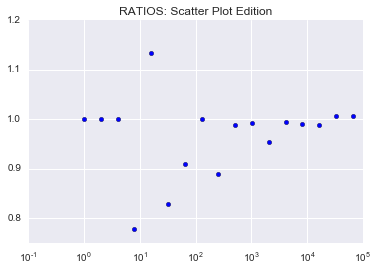

In [31]:
plt.scatter([2**n for n in range(len(rats))], rats)
plt.title('RATIOS: Scatter Plot Edition')
plt.xscale('log')
plt.show()

In [88]:
def trials(trials=20, flips=2**16):
    mean_trials = []
    mean_stds = []
    counter = 1
    while counter <= trials:
        totals, hcount, tcount, diffs, rats, means, stds = simulate_flips(flips)
        for item in means:
            mean_trials.append(item)
        for item in stds:
            mean_stds.append(item)
        counter += 1
    return mean_trials, mean_stds

In [89]:
mean_trials, mean_stds = trials()

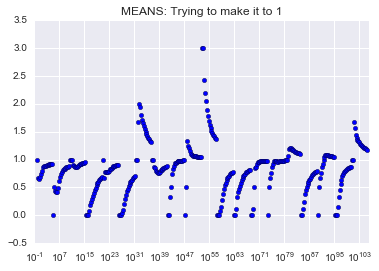

In [90]:
plt.scatter([2**n for n in range(len(mean_trials))], mean_trials)
plt.title('MEANS: Trying to make it to 1')
plt.xscale('log')
plt.show()

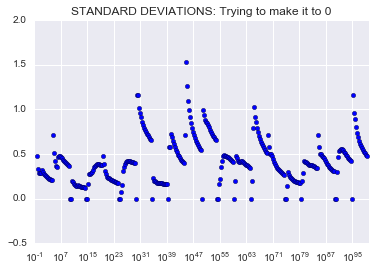

In [91]:
plt.scatter([2**n for n in range(len(mean_stds))], mean_stds)
plt.title('STANDARD DEVIATIONS: Trying to make it to 0')
plt.xscale('log')
plt.show()

## Thoughts for Means and Standard Deviations

Mean definitely seems to always approach 1, but Standard Deviation seems to approach something like .25.  

In [104]:
def head_trials(trials=100000, flips=100):
    head2flips = []
    counter = 1
    while counter <= trials:
        totals, hcount, tcount, diffs, rats, means, stds = simulate_flips(flips)
        head2flips.append(totals['heads']/flips)
        counter += 1
    return head2flips

In [105]:
head2flips = head_trials()

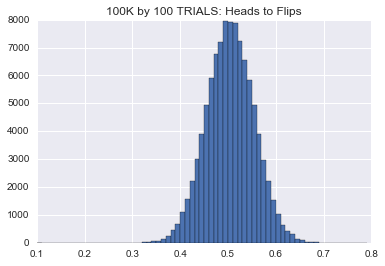

In [108]:
plt.hist(head2flips, bins=np.arange(0.1,0.8,.01))
plt.title('100K by 100 TRIALS: Heads to Flips')
plt.show()

In [107]:
h2f = head_trials(100000, 1000)

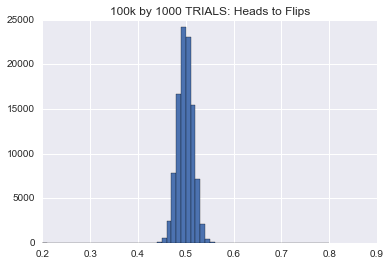

In [114]:
plt.hist(h2f, bins=np.arange(0.2, 0.8, .01))
plt.title('100k by 1000 TRIALS: Heads to Flips')
plt.show()

## Thoughts
.5 is definitely very frequent... which is good, because you'd expect heads to show up about half the time. 